In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import seaborn as sns


pd.set_option('display.max_columns', None)

In [2]:
full_table = pd.read_csv("data/dados TFM 2016.csv")
full_table

Categoria   Departamento            Produto Região   Loja  Evento  \
0      SUPERMARKET  SUPERMARKET_3  SUPERMARKET_3_412    BOS  BOS_1  Easter   
1      SUPERMARKET  SUPERMARKET_3  SUPERMARKET_3_498    BOS  BOS_1  Easter   
2      SUPERMARKET  SUPERMARKET_3  SUPERMARKET_3_547    BOS  BOS_1  Easter   
3      SUPERMARKET  SUPERMARKET_3  SUPERMARKET_3_580    BOS  BOS_1  Easter   
4      SUPERMARKET  SUPERMARKET_3    SUPERMARKET_3_7    BOS  BOS_1  Easter   
...            ...            ...                ...    ...    ...     ...   
29994  HOME&GARDEN  HOME&GARDEN_1  HOME&GARDEN_1_333    BOS  BOS_2  Easter   
29995  HOME&GARDEN  HOME&GARDEN_1   HOME&GARDEN_1_39    BOS  BOS_2  Easter   
29996  HOME&GARDEN  HOME&GARDEN_1  HOME&GARDEN_1_424    BOS  BOS_2  Easter   
29997  HOME&GARDEN  HOME&GARDEN_1  HOME&GARDEN_1_528    BOS  BOS_2  Easter   
29998  HOME&GARDEN  HOME&GARDEN_1  HOME&GARDEN_1_529    BOS  BOS_2  Easter   

       Suma de Qtd. Vendida  Promedio de Preço médio de venda  
0                         6                               3.0  
1                         1                               3.0  
2                         2                               3.0  
3                         7                               3.0  
4                        27                               3.0  
...                     ...                               ...  
29994                     1                             371.0  
29995                     1                             371.0  
29996                     1                             371.0  
29997                     2                             371.0  
29998                     1                             371.0  

[29999 rows x 8 columns]

In [3]:
# Converter dados para uso no modelo
encoder = OneHotEncoder()

encoded_data = encoder.fit_transform(full_table[['Categoria','Departamento','Produto','Evento','Loja','Região']]).toarray()

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Categoria','Departamento','Produto','Evento','Loja','Região']))

df_encoded = pd.concat([full_table, encoded_df], axis=1)

df_encoded

Categoria   Departamento            Produto Região   Loja  Evento  \
0      SUPERMARKET  SUPERMARKET_3  SUPERMARKET_3_412    BOS  BOS_1  Easter   
1      SUPERMARKET  SUPERMARKET_3  SUPERMARKET_3_498    BOS  BOS_1  Easter   
2      SUPERMARKET  SUPERMARKET_3  SUPERMARKET_3_547    BOS  BOS_1  Easter   
3      SUPERMARKET  SUPERMARKET_3  SUPERMARKET_3_580    BOS  BOS_1  Easter   
4      SUPERMARKET  SUPERMARKET_3    SUPERMARKET_3_7    BOS  BOS_1  Easter   
...            ...            ...                ...    ...    ...     ...   
29994  HOME&GARDEN  HOME&GARDEN_1  HOME&GARDEN_1_333    BOS  BOS_2  Easter   
29995  HOME&GARDEN  HOME&GARDEN_1   HOME&GARDEN_1_39    BOS  BOS_2  Easter   
29996  HOME&GARDEN  HOME&GARDEN_1  HOME&GARDEN_1_424    BOS  BOS_2  Easter   
29997  HOME&GARDEN  HOME&GARDEN_1  HOME&GARDEN_1_528    BOS  BOS_2  Easter   
29998  HOME&GARDEN  HOME&GARDEN_1  HOME&GARDEN_1_529    BOS  BOS_2  Easter   

       Suma de Qtd. Vendida  Promedio de Preço médio de venda  \
0                         6                               3.0   
1                         1                               3.0   
2                         2                               3.0   
3                         7                               3.0   
4                        27                               3.0   
...                     ...                               ...   
29994                     1                             371.0   
29995                     1                             371.0   
29996                     1                             371.0   
29997                     2                             371.0   
29998                     1                             371.0   

       Categoria_ACCESORIES  Categoria_HOME&GARDEN  Categoria_SUPERMARKET  \
0                       0.0                    0.0                    1.0   
1                       0.0                    0.0                    1.0   
2                       0.0                    0.0                    1.0   
3                       0.0                    0.0                    1.0   
4                       0.0                    0.0                    1.0   
...                     ...                    ...                    ...   
29994                   0.0                    1.0                    0.0   
29995                   0.0                    1.0                    0.0   
29996                   0.0                    1.0                    0.0   
29997                   0.0                    1.0                    0.0   
29998                   0.0                    1.0                    0.0   

       Departamento_ACCESORIES_1  Departamento_ACCESORIES_2  \
0                            0.0                        0.0   
1                            0.0                        0.0   
2                            0.0                        0.0   
3                            0.0                        0.0   
4                            0.0                        0.0   
...                          ...                        ...   
29994                        0.0                        0.0   
29995                        0.0                        0.0   
29996                        0.0                        0.0   
29997                        0.0                        0.0   
29998                        0.0                        0.0   

       Departamento_HOME&GARDEN_1  Departamento_HOME&GARDEN_2  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             0.0                         0.0   
4                             0.0                         0.0   
...                           ...                         ...   
29994                         1.0                         0.0   
29995                         1.0                         0.0   
29996                   

In [4]:
# Converter colunas para deixar somente numeros inteiros
df_encoded['Suma de Qtd. Vendida'].astype('int64')
df_encoded['Promedio de Preço médio de venda'].astype('int64')

df_encoded

Categoria   Departamento            Produto Região   Loja  Evento  \
0      SUPERMARKET  SUPERMARKET_3  SUPERMARKET_3_412    BOS  BOS_1  Easter   
1      SUPERMARKET  SUPERMARKET_3  SUPERMARKET_3_498    BOS  BOS_1  Easter   
2      SUPERMARKET  SUPERMARKET_3  SUPERMARKET_3_547    BOS  BOS_1  Easter   
3      SUPERMARKET  SUPERMARKET_3  SUPERMARKET_3_580    BOS  BOS_1  Easter   
4      SUPERMARKET  SUPERMARKET_3    SUPERMARKET_3_7    BOS  BOS_1  Easter   
...            ...            ...                ...    ...    ...     ...   
29994  HOME&GARDEN  HOME&GARDEN_1  HOME&GARDEN_1_333    BOS  BOS_2  Easter   
29995  HOME&GARDEN  HOME&GARDEN_1   HOME&GARDEN_1_39    BOS  BOS_2  Easter   
29996  HOME&GARDEN  HOME&GARDEN_1  HOME&GARDEN_1_424    BOS  BOS_2  Easter   
29997  HOME&GARDEN  HOME&GARDEN_1  HOME&GARDEN_1_528    BOS  BOS_2  Easter   
29998  HOME&GARDEN  HOME&GARDEN_1  HOME&GARDEN_1_529    BOS  BOS_2  Easter   

       Suma de Qtd. Vendida  Promedio de Preço médio de venda  \
0                         6                               3.0   
1                         1                               3.0   
2                         2                               3.0   
3                         7                               3.0   
4                        27                               3.0   
...                     ...                               ...   
29994                     1                             371.0   
29995                     1                             371.0   
29996                     1                             371.0   
29997                     2                             371.0   
29998                     1                             371.0   

       Categoria_ACCESORIES  Categoria_HOME&GARDEN  Categoria_SUPERMARKET  \
0                       0.0                    0.0                    1.0   
1                       0.0                    0.0                    1.0   
2                       0.0                    0.0                    1.0   
3                       0.0                    0.0                    1.0   
4                       0.0                    0.0                    1.0   
...                     ...                    ...                    ...   
29994                   0.0                    1.0                    0.0   
29995                   0.0                    1.0                    0.0   
29996                   0.0                    1.0                    0.0   
29997                   0.0                    1.0                    0.0   
29998                   0.0                    1.0                    0.0   

       Departamento_ACCESORIES_1  Departamento_ACCESORIES_2  \
0                            0.0                        0.0   
1                            0.0                        0.0   
2                            0.0                        0.0   
3                            0.0                        0.0   
4                            0.0                        0.0   
...                          ...                        ...   
29994                        0.0                        0.0   
29995                        0.0                        0.0   
29996                        0.0                        0.0   
29997                        0.0                        0.0   
29998                        0.0                        0.0   

       Departamento_HOME&GARDEN_1  Departamento_HOME&GARDEN_2  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             0.0                         0.0   
4                             0.0                         0.0   
...                           ...                         ...   
29994                         1.0                         0.0   
29995                         1.0                         0.0   
29996                   

In [5]:
# Deixar somente colunas relevantes
df_encoded = df_encoded.drop(columns=['Categoria', 'Departamento','Produto','Evento','Loja','Região'])
df_encoded

Suma de Qtd. Vendida  Promedio de Preço médio de venda  \
0                         6                               3.0   
1                         1                               3.0   
2                         2                               3.0   
3                         7                               3.0   
4                        27                               3.0   
...                     ...                               ...   
29994                     1                             371.0   
29995                     1                             371.0   
29996                     1                             371.0   
29997                     2                             371.0   
29998                     1                             371.0   

       Categoria_ACCESORIES  Categoria_HOME&GARDEN  Categoria_SUPERMARKET  \
0                       0.0                    0.0                    1.0   
1                       0.0                    0.0                    1.0   
2                       0.0                    0.0                    1.0   
3                       0.0                    0.0                    1.0   
4                       0.0                    0.0                    1.0   
...                     ...                    ...                    ...   
29994                   0.0                    1.0                    0.0   
29995                   0.0                    1.0                    0.0   
29996                   0.0                    1.0                    0.0   
29997                   0.0                    1.0                    0.0   
29998                   0.0                    1.0                    0.0   

       Departamento_ACCESORIES_1  Departamento_ACCESORIES_2  \
0                            0.0                        0.0   
1                            0.0                        0.0   
2                            0.0                        0.0   
3                            0.0                        0.0   
4                            0.0                        0.0   
...                          ...                        ...   
29994                        0.0                        0.0   
29995                        0.0                        0.0   
29996                        0.0                        0.0   
29997                        0.0                        0.0   
29998                        0.0                        0.0   

       Departamento_HOME&GARDEN_1  Departamento_HOME&GARDEN_2  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             0.0                         0.0   
4                             0.0                         0.0   
...                           ...                         ...   
29994                         1.0                         0.0   
29995                         1.0                         0.0   
29996                         1.0                         0.0   
29997                         1.0                         0.0   
29998                         1.0                         0.0   

       Departamento_SUPERMARKET_1  Departamento_SUPERMARKET_2  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             0.0                         0.0   
4                             0.0                         0.0   
...                           ...                         ...   
29994                         0.0                         0.0   
29995                         0.0                         0.0   
29996                         0.0                         0.0   
29997                         0.0                         0.0   
29998                         0.0               

In [6]:
# Criar StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)
X_scaled

array([[-0.33577363, -1.52513103, -0.37554874, ...,  1.53357216,
        -0.81725661, -0.65654031],
       [-0.35216871, -1.52513103, -0.37554874, ...,  1.53357216,
        -0.81725661, -0.65654031],
       [-0.3488897 , -1.52513103, -0.37554874, ...,  1.53357216,
        -0.81725661, -0.65654031],
       ...,
       [-0.35216871,  1.57576917, -0.37554874, ...,  1.53357216,
        -0.81725661, -0.65654031],
       [-0.3488897 ,  1.57576917, -0.37554874, ...,  1.53357216,
        -0.81725661, -0.65654031],
       [-0.35216871,  1.57576917, -0.37554874, ...,  1.53357216,
        -0.81725661, -0.65654031]])

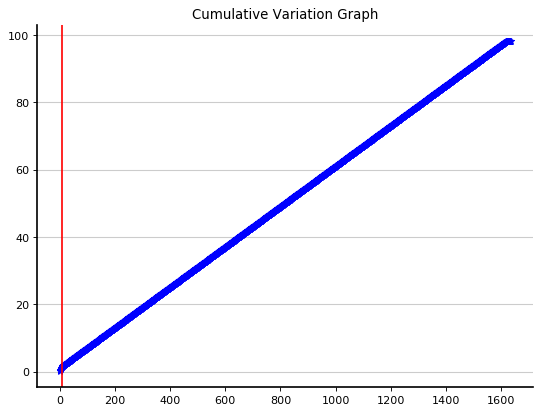

In [7]:
# Principal Components Analysis (PCA)
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_scaled)
data_scaled_pca = pca.transform(X_scaled)
data_scaled_pca

# Determinar la varianza del dataset
var = pca.explained_variance_ratio_

# Determinar la varianza acumulada del dataset
cum_var = np.cumsum(np.round(var, decimals=4)*100)

# Gráfica de la varianza acumulada
fig, ax = plt.subplots(figsize=(8,6), dpi = 80)
plt.title("Cumulative Variation Graph")
plt.plot(cum_var, "b-*")
plt.axvline(x=8, color = "r")
for i in ['bottom', 'left']:
    ax.spines[i].set_color('black')
    ax.spines[i].set_linewidth(1.5) 
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)
ax.set_axisbelow(True)
ax.grid(color='gray', linewidth=1, axis='y', alpha=0.4)
plt.show()

In [13]:
from sklearn.cluster import AgglomerativeClustering

data = df_encoded

# numero de clusters
n_clusters = 3 

# modelo AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=n_clusters)

# Fit do modelo
clusters = model.fit_predict(data)

# add coluna cluster ao dataframe
data['cluster'] = clusters
data

Suma de Qtd. Vendida  Promedio de Preço médio de venda  \
0                         6                               3.0   
1                         1                               3.0   
2                         2                               3.0   
3                         7                               3.0   
4                        27                               3.0   
...                     ...                               ...   
29994                     1                             371.0   
29995                     1                             371.0   
29996                     1                             371.0   
29997                     2                             371.0   
29998                     1                             371.0   

       Categoria_ACCESORIES  Categoria_HOME&GARDEN  Categoria_SUPERMARKET  \
0                       0.0                    0.0                    1.0   
1                       0.0                    0.0                    1.0   
2                       0.0                    0.0                    1.0   
3                       0.0                    0.0                    1.0   
4                       0.0                    0.0                    1.0   
...                     ...                    ...                    ...   
29994                   0.0                    1.0                    0.0   
29995                   0.0                    1.0                    0.0   
29996                   0.0                    1.0                    0.0   
29997                   0.0                    1.0                    0.0   
29998                   0.0                    1.0                    0.0   

       Departamento_ACCESORIES_1  Departamento_ACCESORIES_2  \
0                            0.0                        0.0   
1                            0.0                        0.0   
2                            0.0                        0.0   
3                            0.0                        0.0   
4                            0.0                        0.0   
...                          ...                        ...   
29994                        0.0                        0.0   
29995                        0.0                        0.0   
29996                        0.0                        0.0   
29997                        0.0                        0.0   
29998                        0.0                        0.0   

       Departamento_HOME&GARDEN_1  Departamento_HOME&GARDEN_2  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             0.0                         0.0   
4                             0.0                         0.0   
...                           ...                         ...   
29994                         1.0                         0.0   
29995                         1.0                         0.0   
29996                         1.0                         0.0   
29997                         1.0                         0.0   
29998                         1.0                         0.0   

       Departamento_SUPERMARKET_1  Departamento_SUPERMARKET_2  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             0.0                         0.0   
4                             0.0                         0.0   
...                           ...                         ...   
29994                         0.0                         0.0   
29995                         0.0                         0.0   
29996                         0.0                         0.0   
29997                         0.0                         0.0   
29998                         0.0               

In [14]:
data['cluster'].value_counts()

0    28936
2      878
1      185
Name: cluster, dtype: int64

In [15]:
import joblib

# Salvar o modelo em disco
joblib.dump(model, 'model_clustering/model_agglomerativeclustering_2016.pkl')

['model_clustering/model_agglomerativeclustering_2016.pkl']

In [ ]:
# Carregar o modelo do disco
modelo_carregado = joblib.load('model_clustering/model_agglomerativeclustering_2016.pkl')

In [16]:
data.to_csv('model_clustering/base_2016.csv')

In [17]:
# Obtendo os nomes das colunas originais
original_column_names = ['Categoria','Departamento','Produto','Evento','Loja','Região']

# Criando um DataFrame com as colunas originais
df_original = pd.DataFrame(encoder.inverse_transform(encoded_data), columns=original_column_names)
df_original

# # Certifique-se de que o número de linhas em df_original é o mesmo que em full_table
df_original.index = full_table.index

# # Concatenando o DataFrame original com as colunas originais
df_with_original_columns = pd.concat([data, df_original], axis=1)


# # Removendo as colunas codificadas
df_with_original_columns = df_with_original_columns.drop(columns=encoder.get_feature_names_out(original_column_names))

# # Visualizando o DataFrame com as colunas originais
df_with_original_columns.head()

Suma de Qtd. Vendida  Promedio de Preço médio de venda  cluster  \
0                     6                               3.0        0   
1                     1                               3.0        0   
2                     2                               3.0        0   
3                     7                               3.0        0   
4                    27                               3.0        0   

     Categoria   Departamento            Produto  Evento   Loja Região  
0  SUPERMARKET  SUPERMARKET_3  SUPERMARKET_3_412  Easter  BOS_1    BOS  
1  SUPERMARKET  SUPERMARKET_3  SUPERMARKET_3_498  Easter  BOS_1    BOS  
2  SUPERMARKET  SUPERMARKET_3  SUPERMARKET_3_547  Easter  BOS_1    BOS  
3  SUPERMARKET  SUPERMARKET_3  SUPERMARKET_3_580  Easter  BOS_1    BOS  
4  SUPERMARKET  SUPERMARKET_3    SUPERMARKET_3_7  Easter  BOS_1    BOS

In [18]:
df_with_original_columns['Ano'] = 2016
df_with_original_columns.to_csv('model_clustering/base_original_2016.csv')